# Project 1 (M6): Regression for Numeric Data
# DAV 6150

- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/Zhengnan817/DAV-6150/tree/1f6efa951f5b5984564fb500ce7e1d4271e0e147/Project_1

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Introduction
This project is to analyze the dataset comprised of information pertaining to NY State High School graduation metrics for the 2018-2019 school year. Our goal is to develop one or more regression models to predict the number of dropouts in a school district or for a specific group of students. This prediction will be based on a variety of characteristics related to district characteristics, student groupings, and possibly other relevant factors such as socioeconomic status of students, geographic location of the district, school resources and capacity, etc. 

In short, we will apply the full data science project lifecycle to the implementation and evaluation of a series of regression models that predict the number of student “dropouts” relative to certain properties/characteristics of a given school district and associated student subgrouping. 

### 1.1 Approach:
- [Introduction](#1-introduction): Import the data set and introduce data variables.  
- [EDA](#2-eda): Explore the raw dataset and do analysis based on domain knowledge.  
- [Data Preparation](#3-Data-Preparation): Perform data cleaning, imputation and transformation.  
- [Prepped Data Overview](#4-Prepped-Data-Overview): Re-run the EDA to ensure the data is well prepared for subsequent modeling.  
- [Regression Modeling](#5-Regression-Modeling): Perform two Poisson, two different negative binomial, two multiple linear regression models and analyse the metrics of the model.  
- [Select Models](#6-Select-Models): Explain how we selected the model selection criteria.  
- [Conclusion](#7-Conclusion)

### 1.2 Data Introduction


The dataset is comprised of more than 73,000 observations, each of which pertains to a particular NY State school district and associated subgroupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. A data dictionary describing the attributes contained within the file is provided below.  
The dataset is sourced from the NY 
State Education Department (NYSED): https://data.nysed.gov/downloads.php
Read the data from our github repository. The dataframe is shown below.

In [44]:
school_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/M6/Project1_Data.csv")
school_raw.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [45]:
school_raw.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

In [46]:
school_raw.shape

(73152, 29)

# 2. Exploratory Data Analysis
In this part, we will explore the raw dataset and analyze the missing and invalid values, make histograms and other graphs to determine how to clean the data to improve its usability.  
First start with the matrix of the dataframe. The dataframe has 73152 rows of observations and 29 attributes. We will dive deeper into the dataframe by looking at different columns.

In this dataset all the missing value are marked as "-" and we need to turn them into NaN.  
And alter the percentage data from string to float.

In [47]:
school_raw=school_raw[~school_raw['enroll_cnt'].isin(['-'])] 
school_raw['grad_pct'] = school_raw['grad_pct'].str.strip('%').astype(float)/100 
school_raw['local_pct'] = school_raw['local_pct'].str.strip('%').astype(float)/100 
school_raw['reg_pct'] = school_raw['reg_pct'].str.strip('%').astype(float)/100 
school_raw['reg_adv_pct'] = school_raw['reg_adv_pct'].str.strip('%').astype(float)/100 
school_raw['non_diploma_credential_pct'] = school_raw['non_diploma_credential_pct'].str.strip('%').astype(float)/100 
school_raw['still_enr_cnt'] = school_raw['still_enr_cnt'].str.strip('%').astype(float)/100
school_raw['ged_pct'] = school_raw['ged_pct'].str.strip('%').astype(float)/100
school_raw['dropout_pct'] = school_raw['dropout_pct'].str.strip('%').astype(float)/100
school_raw['still_enr_pct'] = school_raw['still_enr_pct'].str.strip('%').astype(float)/100

school_raw["enroll_cnt"] = school_raw["enroll_cnt"].astype("float64")
school_raw["grad_cnt"] = school_raw["grad_cnt"].astype("float64")
school_raw["local_cnt"] = school_raw["local_cnt"].astype("float64")
school_raw["reg_cnt"] = school_raw["reg_cnt"].astype("float64")
school_raw["reg_adv_cnt"] = school_raw["reg_adv_cnt"].astype("float64")
school_raw["non_diploma_credential_cnt"] = school_raw["non_diploma_credential_cnt"].astype("float64")
school_raw["ged_cnt"] = school_raw["ged_cnt"].astype("float64")
school_raw["dropout_cnt"] = school_raw["dropout_cnt"].astype("int64")

Before starting, we define the functions to be used for EDA.

In [48]:
def create_subplots(attributes):
    max_cols_per_row = 5
    num_attributes = len(attributes)
    nrows = -(-num_attributes // max_cols_per_row) 
    ncols = min(num_attributes, max_cols_per_row)  
    figsize_width = ncols * 4 
    figsize_height = nrows * 5
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize_width, figsize_height), squeeze=False)
    return fig, axes

def hist(attributes):
    fig, axes = create_subplots(attributes)
    for i, attribute in enumerate(attributes):
        ax = axes[i // 5][i % 5] 
        sns.histplot(data=school_raw[attribute], ax=ax)
        ax.set_xlabel(attribute)
        ax.set_ylabel('')
    plt.show()

def box(attributes):
    fig, axes = create_subplots(attributes)
    for i, attribute in enumerate(attributes):
        ax = axes[i // 5][i % 5] 
        sns.boxplot(data=school_raw[attribute], ax=ax)
        ax.set_xlabel(attribute)
        ax.set_ylabel('')
    plt.show()

def bar(attributes):
    fig, axes = create_subplots(attributes)
    for i, attribute in enumerate(attributes):
        ax = axes[i // 5][i % 5]  
        sns.countplot(x=school_raw[attribute], ax=ax)
        ax.set_xlabel(attribute)
        ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=90)
    plt.show()


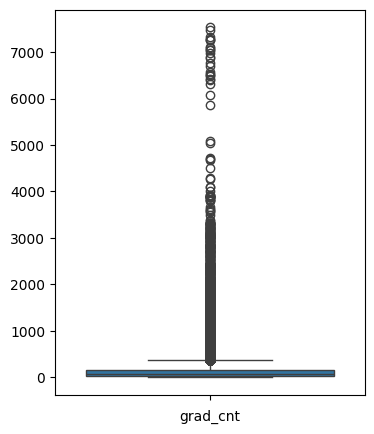

In [49]:
box(['grad_cnt'])

| Variables                    | Definition                                                                                      | Data type  | Distribution | Correlation | Explanation                                                                                                                                                         |
|------------------------------|-------------------------------------------------------------------------------------------------|------------|--------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| report_school_year           | School year for which data is reported                                                          | Categorical| Uniform      | NA          | This variable is a fixed value only contain the 2018-2018 academic year.                                    |
| aggregation_index            | Numeric index for aggregation method                                                            | Categorical| Uniform      | NA          | Represents how the data is aggregated, which also only cantain one methods.                                                   |
| aggregation_type             | Type of aggregation used for data                                                               | Categorical| Uniform      | NA          | Describes the aggregation method used, which only have district value and not a predictive factor.                                     |
| aggregation_name             | Name of the aggregation, typically the name of the school district                             | Categorical| NA      | NA          | The name of the district school provides context but does not have predictive power in a regression model.                                                                 |

__Feature Selection:__   
The 'report_school_year', 'aggregation_index','aggregation_type' variable represent the school year and only has one unique value, which will not help with prediction. Thus can be dropped. For 'aggregation_name', we observe 680 distinct types of school districts, and the repetitions arise due to variations in subgroups and enrollment years. Since our analysis focuses on the relationship between dropout rates and subgroup, we can exclude 'aggregation_name' from our feature set.

In [50]:
display(school_raw["report_school_year"].unique())
display(school_raw["aggregation_index"].unique())
display(school_raw["aggregation_type"].unique())
display(school_raw["aggregation_name"].value_counts())

array(['2018-19'], dtype=object)

array([3])

array(['District'], dtype=object)

aggregation_name
SYRACUSE CITY SCHOOL DISTRICT                         116
NEW YORK CITY GEOGRAPHIC DISTRICT #28                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #14                 108
NEW YORK CITY GEOGRAPHIC DISTRICT # 3                 108
NEW YORK CITY GEOGRAPHIC DISTRICT #31                 108
                                                     ... 
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT          4
FISHERS ISLAND UNION FREE SCHOOL DISTRICT               4
LONG LAKE CENTRAL SCHOOL DISTRICT                       2
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT      2
BERKSHIRE UNION FREE SCHOOL DISTRICT                    2
Name: count, Length: 677, dtype: int64

| Variables         | Definition                                                  | Data type   | Distribution | Correlation | Explanation                                                                                                       |
|-------------------|-------------------------------------------------------------|-------------|--------------|-------------|-------------------------------------------------------------------------------------------------------------------|
| nrc_code          | Code for needs/resource capacity                            | Categorical   | Varied       | Non_Linear      | 1 to 6 represent different district demand of capacity, same to the nrc_desc, which might correlate with dropout rates due to resource constraints. |
| nrc_desc          | Description of school district type based on needs/resource capacity | Categorical | Varied       | Non_Linear      | It might correlating with dropout rates. |
| county_code       | Numeric code for county name                                | Categorical   | Varied       | Non_Linear        | It provide 62 code of NY county, the code correspond to different regions, which could see in conty_name. |
| county_name       | Full name of applicable NY State county                    | Categorical | Varied       | Non_Linear         | It represents 62 county of NY with limited direct predictive value for dropout rates.     |
| nyc_ind           | Indicator of whether the school district resides within NYC | Binary      | Bi-modal     | Non_Linear      | Most schools are not in NYC, which might correlate with dropout rates due to urban vs. rural educational resource disparities.   |
| membership_desc   | School year in which students first enrolled in high school | Categorical | Varied       | Non_Linear         | Provides year of admission from 2013 to 2015 and the length of schooling. |

__Feature Selection:__   
Since we want to analyze the impact of distinct on dropout, and some columns represent the same meaning, for subsequent modeling, we can drop out the following columns: 'nrc_desc', 'county_name'.

In [51]:
display(school_raw["county_name"].value_counts())

county_name
SUFFOLK        3996
NASSAU         3152
WESTCHESTER    2700
ERIE           1770
MONROE         1356
               ... 
WYOMING         174
RICHMOND        108
YATES           100
SCHUYLER         94
HAMILTON         38
Name: count, Length: 62, dtype: int64

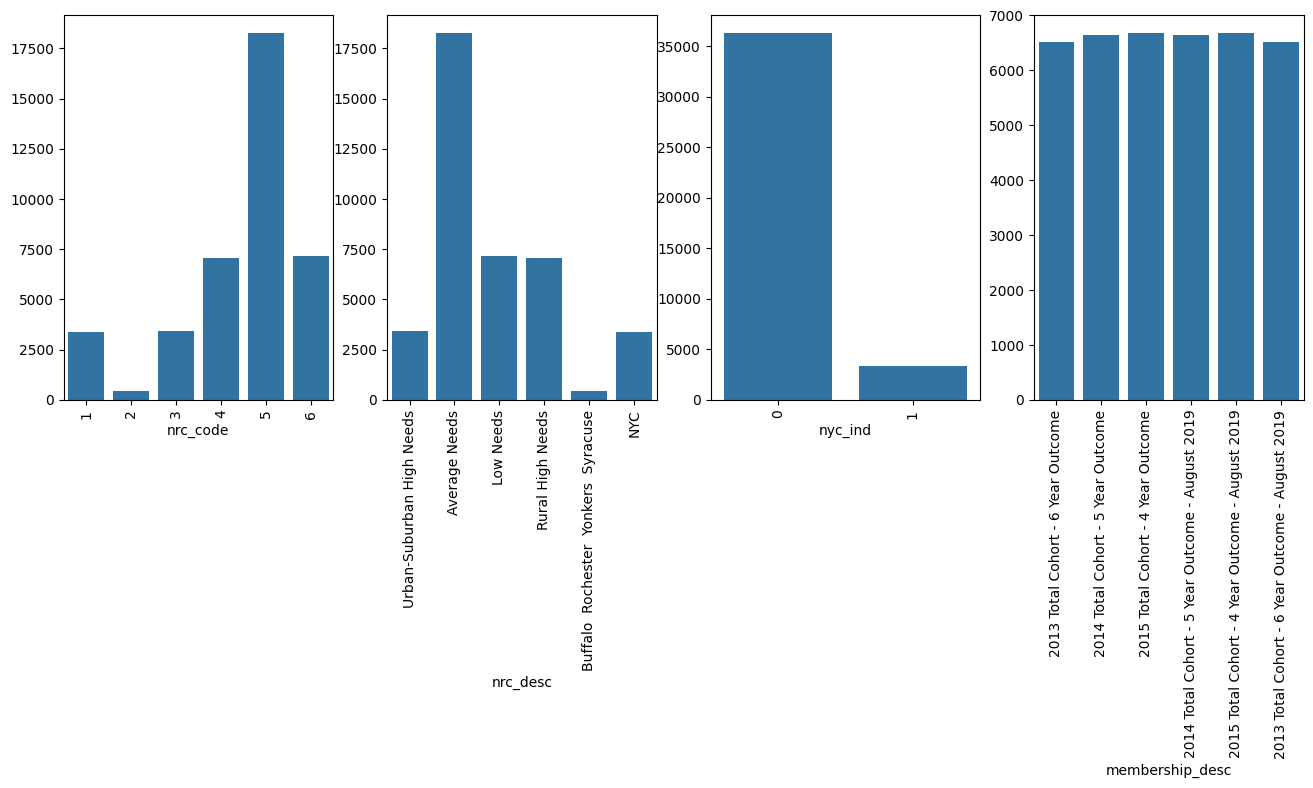

In [52]:
bar(['nrc_code','nrc_desc','nyc_ind','membership_desc'])

| Variables       | Definition                                 | Data type   | Distribution | Correlation | Explanation                                                                                                       |
|-----------------|--------------------------------------------|-------------|--------------|-------------|-------------------------------------------------------------------------------------------------------------------|
| subgroup_name/code   | Description of student subgrouping         | Categorical | Varied       | Non_Linear        | Including gender, race, whether to join the military, whether to be homeless, health level, etc.       |

__Feature Selection:__   
We can group 'subgroup_name' due to it represents different categories, which can  facilitate subsequent research.

In [53]:
display(school_raw["subgroup_name"].value_counts())

subgroup_name
All Students                         4046
Male                                 3970
Female                               3970
Economically Disadvantaged           3918
Not Economically Disadvantaged       3918
General Education Students           3632
Students with Disabilities           3632
White                                2790
Hispanic                             1878
Black                                1416
Asian/Pacific Islander               1122
Homeless                              962
Not Homeless                          962
English Language Learner              872
Not English Language Learner          872
Multiracial                           708
Formerly English Language Learner     572
American Indian/Alaska Native         270
In Foster Care                         36
Not in Foster Care                     36
Parent in Armed Forces                 28
Parent Not in Armed Forces             28
Migrant                                18
Not Migrant         

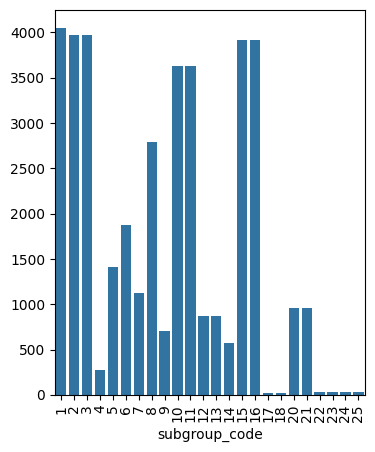

In [54]:
bar(['subgroup_code'])

| Variables                   | Definition                                                  | Data type   | Distribution   | Correlation    | Explanation                                                                                                                       |
|-----------------------------|-------------------------------------------------------------|-------------|----------------|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| enroll_cnt                  | Number of students enrolled                                 | Numerical   | Right-Skewed  | Non_Linear           | The total enrollment count could correlate with dropout rates; larger groups might have higher numbers of dropouts.     |
| grad_cnt/pct                    | Number of students graduated                                | Numerical   | Right-Skewed  | Non_Linear | The number of graduates correlates with dropouts, as higher graduation rates typically mean fewer dropouts.            |                                      
| local_cnt/pct                   | Students awarded a "Local" diploma                          | Numerical   | Right-Skewed         | Non_Linear  | It indicates a subset of graduates.                                           |               
| reg_cnt/pct                     | Students awarded a "Regents" diploma                        | Numerical   | Right-Skewed         | Non_Linear  | The Regents Scholarship, based on academic excellence, is a prestigious scholarship awarded to undergraduate student. |
| reg_adv_cnt/pct                 | Students awarded a "Regents Advanced" diploma               | Numerical   | Right-Skewed         | Non_Linear           | To earn a Regents diploma with advanced designation with honors, a student needs to have a computed average score of 90 or higher on all Regents student.                              |
| non_diploma_credential_cnt/pct  | Students achieving a non-diploma credential                 | Numerical   | Right-Skewed         | Non_Linear         | It reflects students obtaining alternative credentials.                                     |
| still_enrolled_cnt/pct          | Students not graduated but still enrolled                   | Numerical   | Right-Skewed         | Non_Linear | Indicates students who have not dropped out but have not graduated, which correlate with dropout rates.                      |
| ged_cnt/pct                     | Students awarded a "GED" diploma                            | Numerical   | Right-Skewed         | Non_Linear         | Reflects students who obtained a GED, which means a test to examine the lining of the esophagus, stomach, and first part of the small intestine . |


__Feature Selection:__   
From the histogram and box plots, we can observe that most of the attributes have many outliers and do not follow a normal distribution. Only "reg_pct" and "reg_adv_pct" follow nearly normal distribution. For features that do not follow a normal distribution, we can use a log transformation or other method to reduce skew and normalize the data.


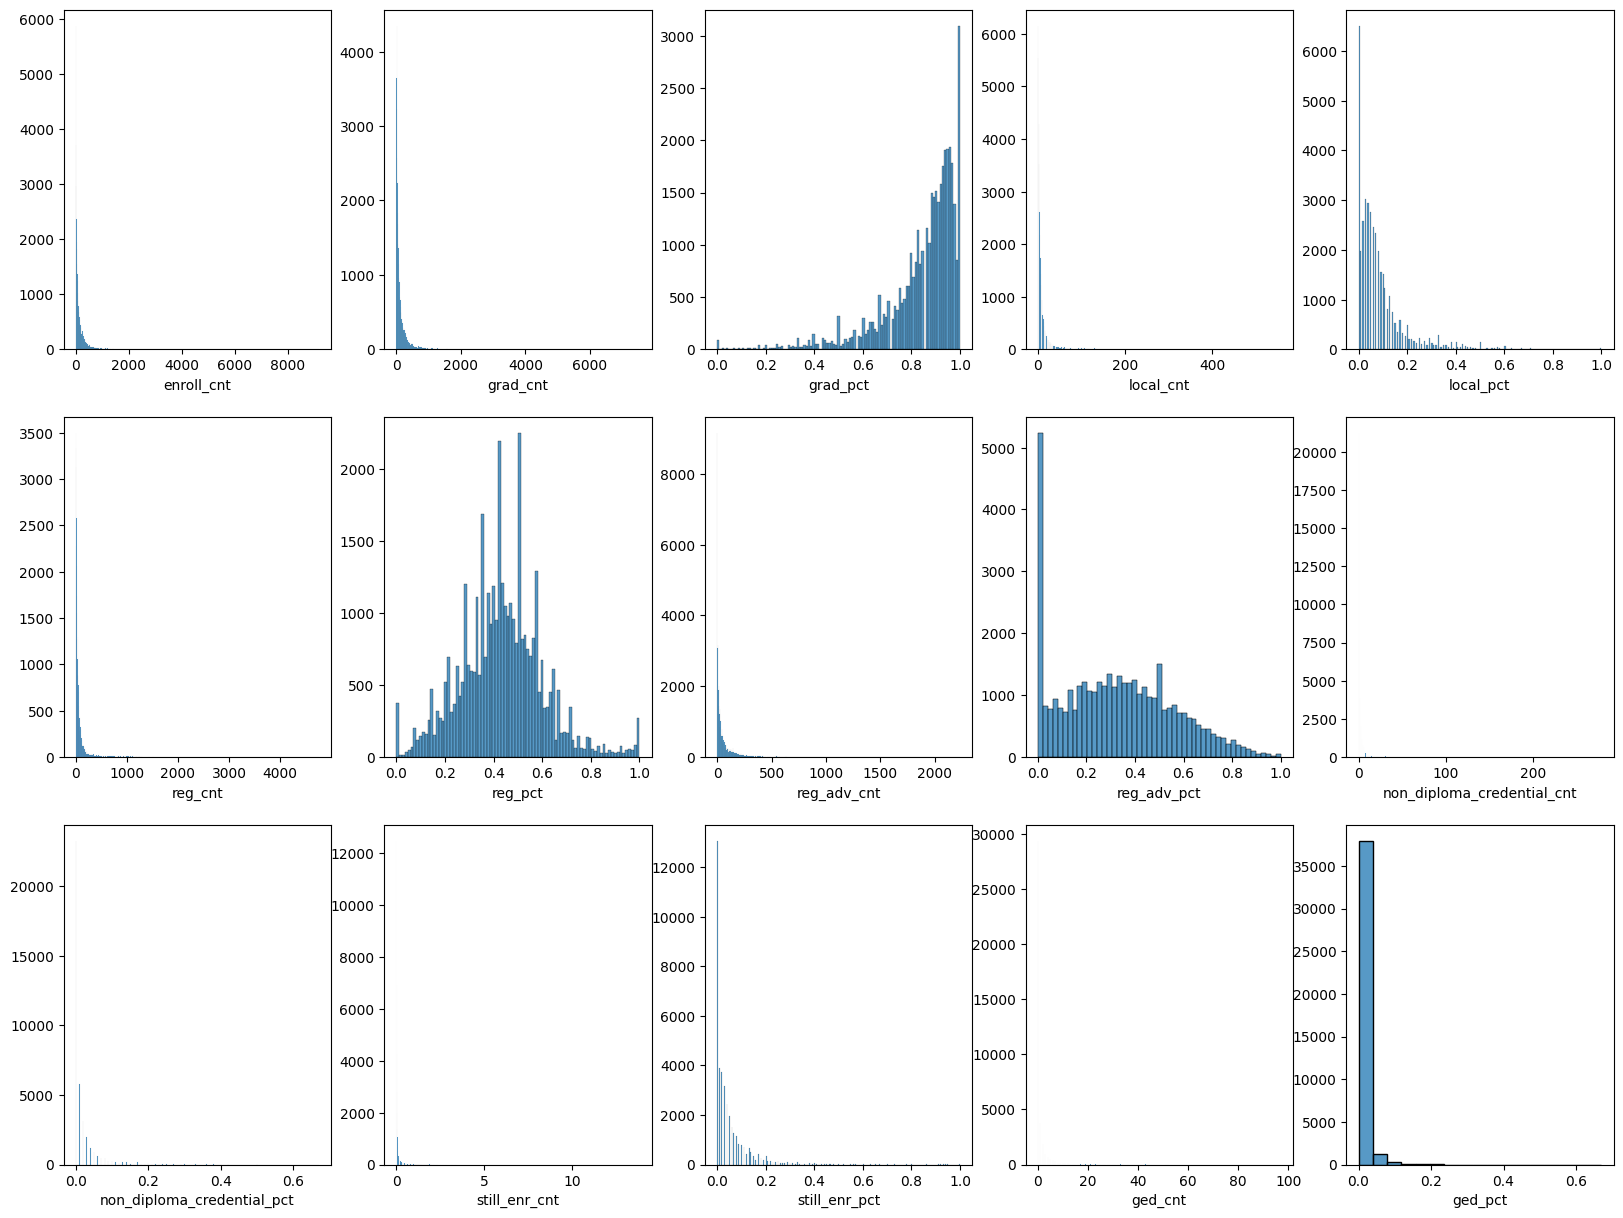

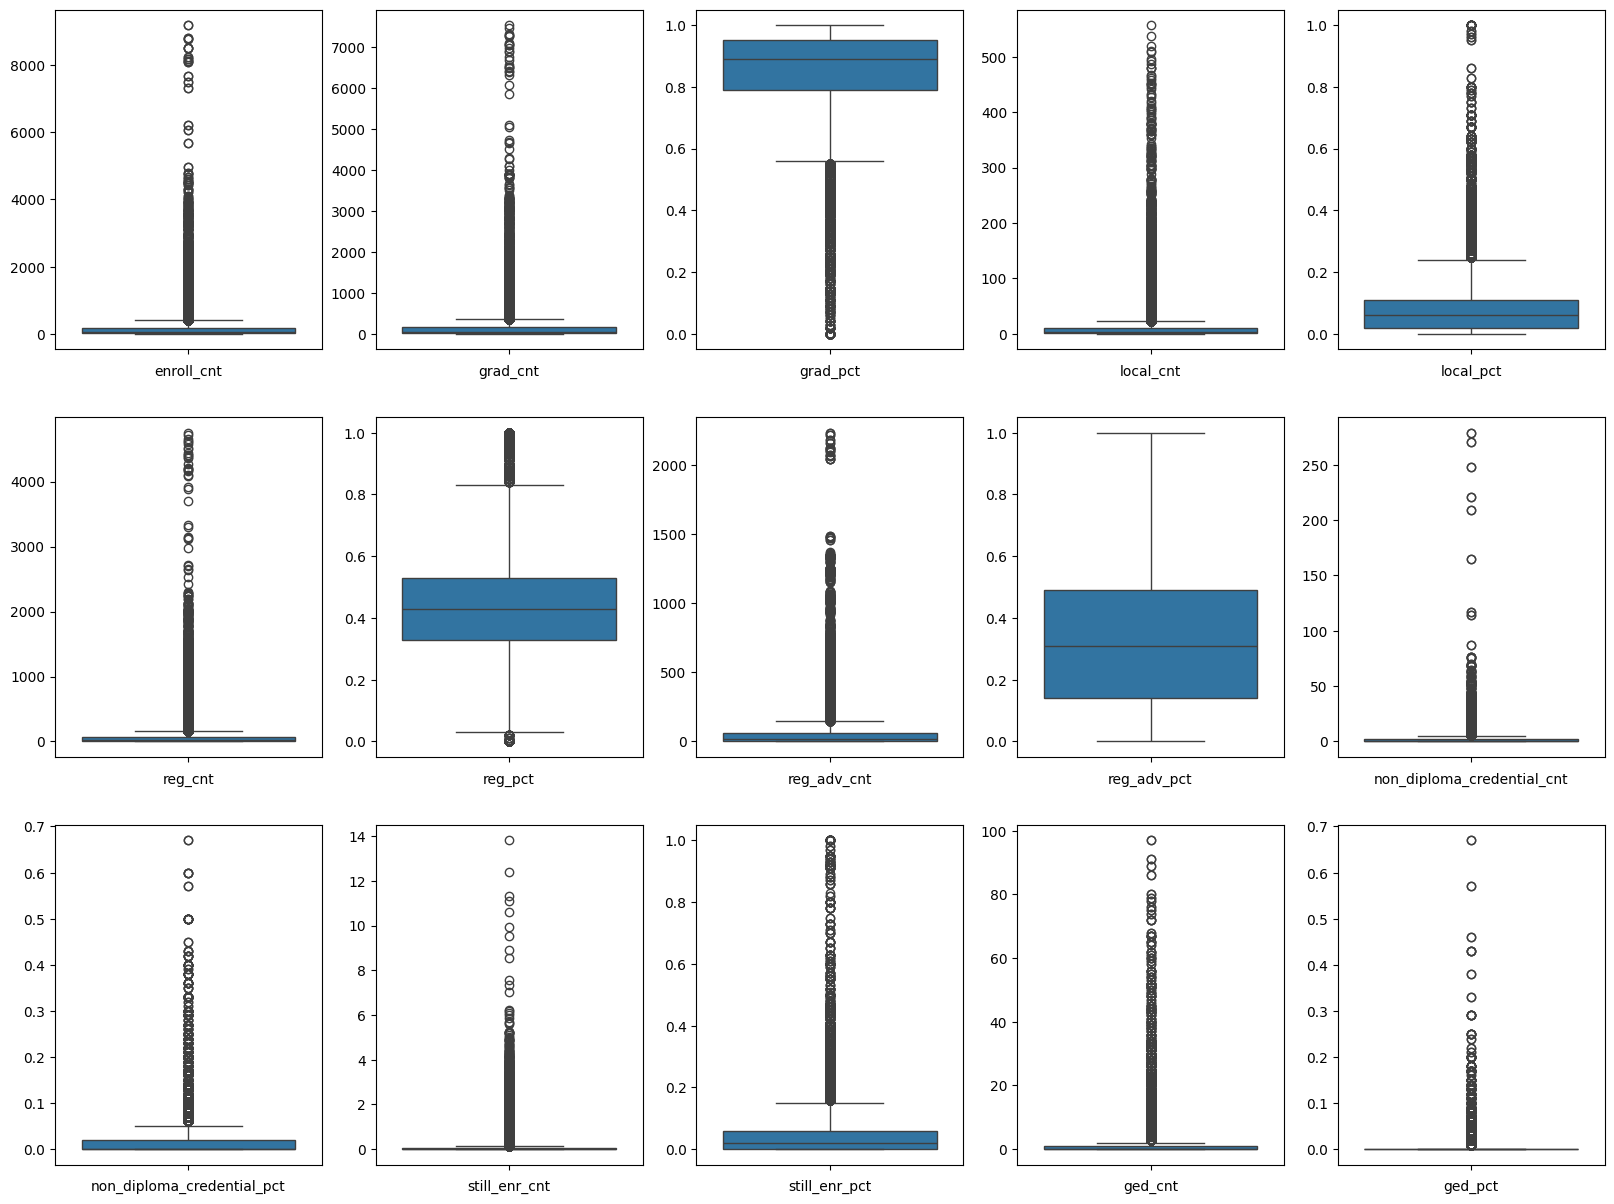

In [55]:
hist([ 'enroll_cnt', 'grad_cnt', 'grad_pct','local_cnt','local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct'])
box(['enroll_cnt', 'grad_cnt', 'grad_pct','local_cnt','local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct','still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct'])

| Variables     | Definition                                            | Data type   | Distribution | Correlation       | Explanation                                                                                                 |
|---------------|-------------------------------------------------------|-------------|--------------|-------------------|-------------------------------------------------------------------------------------------------------------|
| dropout_cnt/pct                | Students who discontinued enrollment                        | Numerical   | Right-Skewed  | Non_Linear| The target variable for prediction, representing the number of students who dropped out.                                          |


__Feature Selection:__   
From the histogram and box plots, we can observe that the dropout had some outliers and right-skewed. These outliers may need to be handled before further modeling. And they may need to be transformed to improve their distribution.


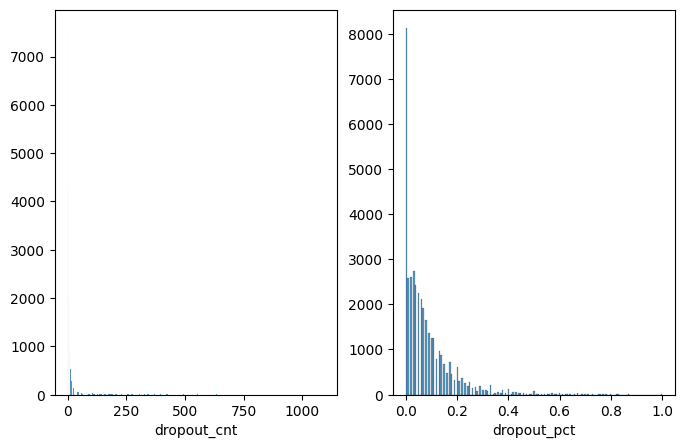

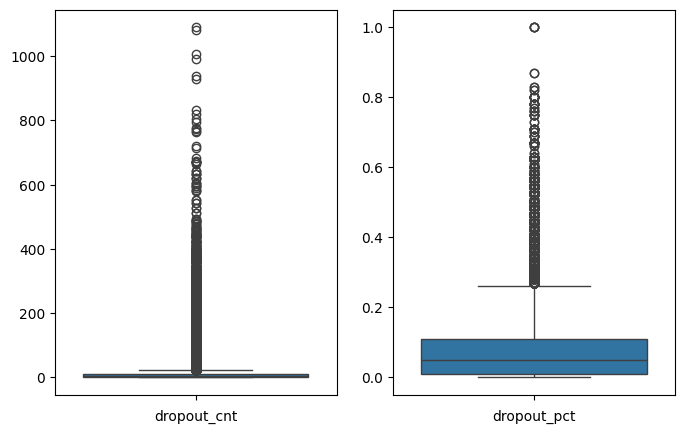

In [56]:
hist(['dropout_cnt','dropout_pct'])
box(['dropout_cnt','dropout_pct'])

From the heatmap, we can observe that the 'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'still_enr_cnt'and ged_cnt have strong relationship with the response variable "drop_cnt", these features may be the important predictor of dropout. We should consider multicollinearity during modeling, we can use regularization techniques to mitigate its potential impact on model performance.

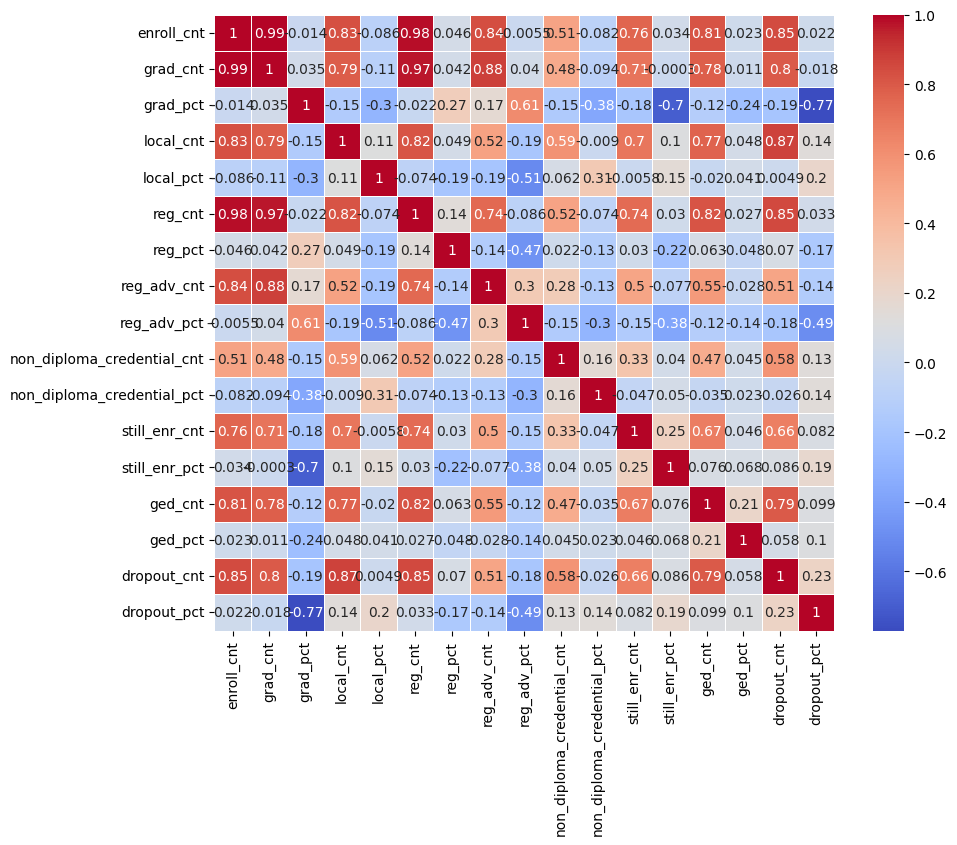

In [57]:
new_raw = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 'non_diploma_credential_cnt', 'non_diploma_credential_pct', 'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct']
data_subset = school_raw[new_raw]
correlation_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

# 3. Data Preparation

### 3.1 Data Transformation
First we need to deal with the subgroups within the dataset.  

Now we will melt the subgroups in variale. From the subgroups valuecounts below, we can see that there are 24 subgroups. Since we are pridicting the dropout count and we need each observation to be weighted evenly, we can only use the subgroup "All Students" for observation. To make full use of the data, we will take the percentage of each subgroup and melt them into new variables.

The valuecounts suggests that there are 4074 sets of subgroups and many subgroups are missing. We will select the subgroups that has over 4000 sets to make sure the percentage data is convincing.

In [58]:
school_raw["subgroup_name"].value_counts()

subgroup_name
All Students                         4046
Male                                 3970
Female                               3970
Economically Disadvantaged           3918
Not Economically Disadvantaged       3918
General Education Students           3632
Students with Disabilities           3632
White                                2790
Hispanic                             1878
Black                                1416
Asian/Pacific Islander               1122
Homeless                              962
Not Homeless                          962
English Language Learner              872
Not English Language Learner          872
Multiracial                           708
Formerly English Language Learner     572
American Indian/Alaska Native         270
In Foster Care                         36
Not in Foster Care                     36
Parent in Armed Forces                 28
Parent Not in Armed Forces             28
Migrant                                18
Not Migrant         

We filter out other subgroups and keep the subgroup of all students, and calculate the percentage for each school under different years. 
So we have __Parent Not in Armed Forces , Not Homeless , Not Migrant ,Not in Foster Care ,Not English Language Learner , Male ,General Education Students, White ,Economically Disadvantaged ,Students with Disabilities__ as our new variables.  
However there are too many null values due to exsisted null values under certain subgroups. We will only take __Male_pct,Economically Disadvantaged_pct,General Education Students_pct and Students with Disabilities_pct__ as new variables.

In [59]:
df_reshaped=school_raw[school_raw['subgroup_name']=='All Students']
df_reshaped=df_reshaped.dropna()
grouped_membership= school_raw.groupby('membership_desc')
for membership_name, membership in grouped_membership:
    grouped_school= membership.groupby('aggregation_name')
    for school_name, school in grouped_school:
        
        all_student = school[school['subgroup_name']=="All Students"]['enroll_cnt'].iloc[0]
        if pd.isna(all_student):
            continue
        all_student = int(all_student)


        for subgroup in ["Male", "Parent Not in Armed Forces", "Not Homeless", "Not Migrant", "Not in Foster Care", "Not English Language Learner", "General Education Students", "White", "Economically Disadvantaged", "Students with Disabilities"]:
            subgroup_row = school[school['subgroup_name'] == subgroup]
            if not subgroup_row.empty:
                subgroup_enroll = subgroup_row['enroll_cnt'].iloc[0]
            else:
                subgroup_enroll = np.nan
            
            if not pd.isna(subgroup_enroll) and all_student != 0:
                subgroup_pct = int(subgroup_enroll) / all_student
            else:
                subgroup_pct = np.nan
            
            mask_membership = df_reshaped['membership_desc'] == membership_name
            mask_aggregation = df_reshaped['aggregation_name'] == school_name

            # Apply conditions and assign value to respective subgroup column
            df_reshaped.loc[mask_membership & mask_aggregation, f'{subgroup}_pct'] = subgroup_pct

display(df_reshaped[["Male_pct", "Parent Not in Armed Forces_pct", "Not Homeless_pct", "Not Migrant_pct", "Not in Foster Care_pct", "Not English Language Learner_pct", "General Education Students_pct", "White_pct", "Economically Disadvantaged_pct", "Students with Disabilities_pct"]].isnull().sum().sort_values())
excluded_columns = ["Parent Not in Armed Forces_pct", "Not Homeless_pct", "Not Migrant_pct", "Not in Foster Care_pct", "Not English Language Learner_pct","White_pct" ]
df_reshaped = df_reshaped.drop(columns=excluded_columns)
df_reshaped[["Male_pct", "General Education Students_pct", "Economically Disadvantaged_pct", "Students with Disabilities_pct"]]

Male_pct                              76
Economically Disadvantaged_pct       128
General Education Students_pct       414
Students with Disabilities_pct       414
White_pct                           1256
Not Homeless_pct                    3084
Not English Language Learner_pct    3174
Not in Foster Care_pct              4010
Parent Not in Armed Forces_pct      4018
Not Migrant_pct                     4028
dtype: int64

,Male_pct,General Education Students_pct,Economically Disadvantaged_pct,Students with Disabilities_pct
0,0.507599,0.826748,0.495441,0.173252
22,0.505900,0.831858,0.501475,0.168142
44,0.514205,0.862216,0.582386,0.137784
66,0.505900,0.831858,0.501475,0.168142
88,0.514205,0.862216,0.582386,0.137784
...,...,...,...,...
73074,0.591837,0.775510,0.653061,0.224490
73090,0.627119,0.813559,0.440678,0.186441
73105,0.591837,0.775510,0.653061,0.224490
73121,0.627119,0.813559,0.440678,0.186441


### 3.2 Data Cleaning

The dataset has variables that are duplicated. In variable "membership_desc", the rows for "2013 Total Cohort - 6 Year Outcom" and "2013 Total Cohort - 6 Year Outcome - August 201" have extremely similar data.

In [60]:
conditions_to_drop = (df_reshaped['membership_desc'] == '2014 Total Cohort - 5 Year Outcome - August 2019') | \
                     (df_reshaped['membership_desc'] == '2015 Total Cohort - 4 Year Outcome - August 2019') | \
                     (df_reshaped['membership_desc'] == '2013 Total Cohort - 6 Year Outcome - August 2019')


df_cleaned = df_reshaped[~conditions_to_drop]

The percentage variables we add in 3.1 has some null values and we can simply impute them since their are only a few.

In [61]:
# Columns to impute nulls
columns_to_impute = ['Male_pct', 'Economically Disadvantaged_pct', 'General Education Students_pct', 'Students with Disabilities_pct']
for column in columns_to_impute:
    df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)


### 3.3 Column Drop

Since the models we are using are for numeric data, we will drop all the categorical variables. And also drop the variables make no sense according to EDA.

In [62]:
columns_to_drop = ['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name','membership_desc', 'subgroup_code',
       'subgroup_name']
df_school = df_cleaned.drop(columns=columns_to_drop)

### 3.1 Feature Selection

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [64]:
# Response variable
school_target =df_school['dropout_cnt']
# Explotory variables
school_dependent = df_school.drop(labels=['dropout_cnt'], axis=1)

y = school_target
x= school_dependent

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.head(1)

,nyc_ind,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,...,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_pct,Male_pct,General Education Students_pct,Economically Disadvantaged_pct,Students with Disabilities_pct
22307,0,105.0,98.0,0.93,6.0,0.06,45.0,0.43,47.0,0.45,...,0.01,0.0,0.0,0.0,0.0,0.06,0.47619,0.857143,0.438095,0.142857


In [65]:
# Detect highly correlated features
def correlation(data,threshold):
# Set of all the names of correlated columns
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
# We care about absolute coef value
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
corr_features = correlation(X_train,0.85)
corr_features

{'Students with Disabilities_pct',
 'ged_cnt',
 'grad_cnt',
 'local_cnt',
 'reg_adv_cnt',
 'reg_cnt'}

From the above output, these features are highly correlated. In case of overfitting,we remove the first three features.

In [66]:
corr_features = {('Students with Disabilities_pct'),
 ('ged_cnt'),
 ('grad_cnt'),
 ('local_cnt'),
 ('reg_adv_cnt'),
 ('reg_cnt')}
# Update the dataframe based on the result from correlation function
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train

,nyc_ind,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_pct,dropout_pct,Male_pct,General Education Students_pct,Economically Disadvantaged_pct
22307,0,105.0,0.93,0.06,0.43,0.45,1.0,0.01,0.00,0.00,0.0,0.06,0.476190,0.857143,0.438095
30221,0,254.0,0.99,0.01,0.15,0.82,0.0,0.00,0.01,0.00,0.0,0.01,0.574803,0.933071,0.173228
56898,0,685.0,0.90,0.09,0.42,0.39,4.0,0.01,0.15,0.02,0.0,0.07,0.519708,0.817518,0.486131
62274,0,81.0,0.91,0.01,0.48,0.42,0.0,0.00,0.00,0.00,0.0,0.09,0.567901,0.901235,0.271605
3700,0,79.0,0.82,0.01,0.41,0.41,2.0,0.03,0.01,0.01,0.0,0.14,0.493671,0.886076,0.240506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29169,0,246.0,0.97,0.02,0.25,0.71,0.0,0.00,0.07,0.03,0.0,0.00,0.491870,0.845528,0.097561
43990,0,95.0,0.92,0.08,0.59,0.24,1.0,0.01,0.02,0.02,0.0,0.05,0.578947,0.831579,0.536842
59670,0,1561.0,0.70,0.03,0.45,0.22,3.0,0.00,2.24,0.14,0.0,0.16,0.549007,0.900064,0.835362
19274,0,102.0,0.91,0.13,0.50,0.28,3.0,0.03,0.00,0.00,0.0,0.06,0.382353,0.833333,0.470588


Step forward feature selection for training data

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(RandomForestRegressor(), 
           k_features=12, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs = sfs.fit(np.array(X_train), np.array(y_train))


[2024-02-26 00:32:57] Features: 1/12 -- score: 0.7636722897893344
[2024-02-26 00:33:01] Features: 2/12 -- score: 0.9691997275205105
[2024-02-26 00:33:06] Features: 3/12 -- score: 0.966487584557567
[2024-02-26 00:33:10] Features: 4/12 -- score: 0.9619731369589456
[2024-02-26 00:33:15] Features: 5/12 -- score: 0.9629627164418023
[2024-02-26 00:33:19] Features: 6/12 -- score: 0.9602136002996304
[2024-02-26 00:33:24] Features: 7/12 -- score: 0.9627977478630312
[2024-02-26 00:33:28] Features: 8/12 -- score: 0.958627272073289
[2024-02-26 00:33:32] Features: 9/12 -- score: 0.9502175148693093
[2024-02-26 00:33:36] Features: 10/12 -- score: 0.948380109227644
[2024-02-26 00:33:40] Features: 11/12 -- score: 0.9447658840845515
[2024-02-26 00:33:43] Features: 12/12 -- score: 0.9477459219576253

Because the first feature is low. We will drop it to improve the performance.

In [68]:
# Locate the columns
columns_positions = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14]
X1_train = X_train.iloc[:, columns_positions]
X1_train

,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct,Economically Disadvantaged_pct
22307,105.0,0.93,0.06,0.43,0.45,1.0,0.01,0.00,0.0,0.06,0.438095
30221,254.0,0.99,0.01,0.15,0.82,0.0,0.00,0.00,0.0,0.01,0.173228
56898,685.0,0.90,0.09,0.42,0.39,4.0,0.01,0.02,0.0,0.07,0.486131
62274,81.0,0.91,0.01,0.48,0.42,0.0,0.00,0.00,0.0,0.09,0.271605
3700,79.0,0.82,0.01,0.41,0.41,2.0,0.03,0.01,0.0,0.14,0.240506
...,...,...,...,...,...,...,...,...,...,...,...
29169,246.0,0.97,0.02,0.25,0.71,0.0,0.00,0.03,0.0,0.00,0.097561
43990,95.0,0.92,0.08,0.59,0.24,1.0,0.01,0.02,0.0,0.05,0.536842
59670,1561.0,0.70,0.03,0.45,0.22,3.0,0.00,0.14,0.0,0.16,0.835362
19274,102.0,0.91,0.13,0.50,0.28,3.0,0.03,0.00,0.0,0.06,0.470588


# 4. Prepped Data Overview

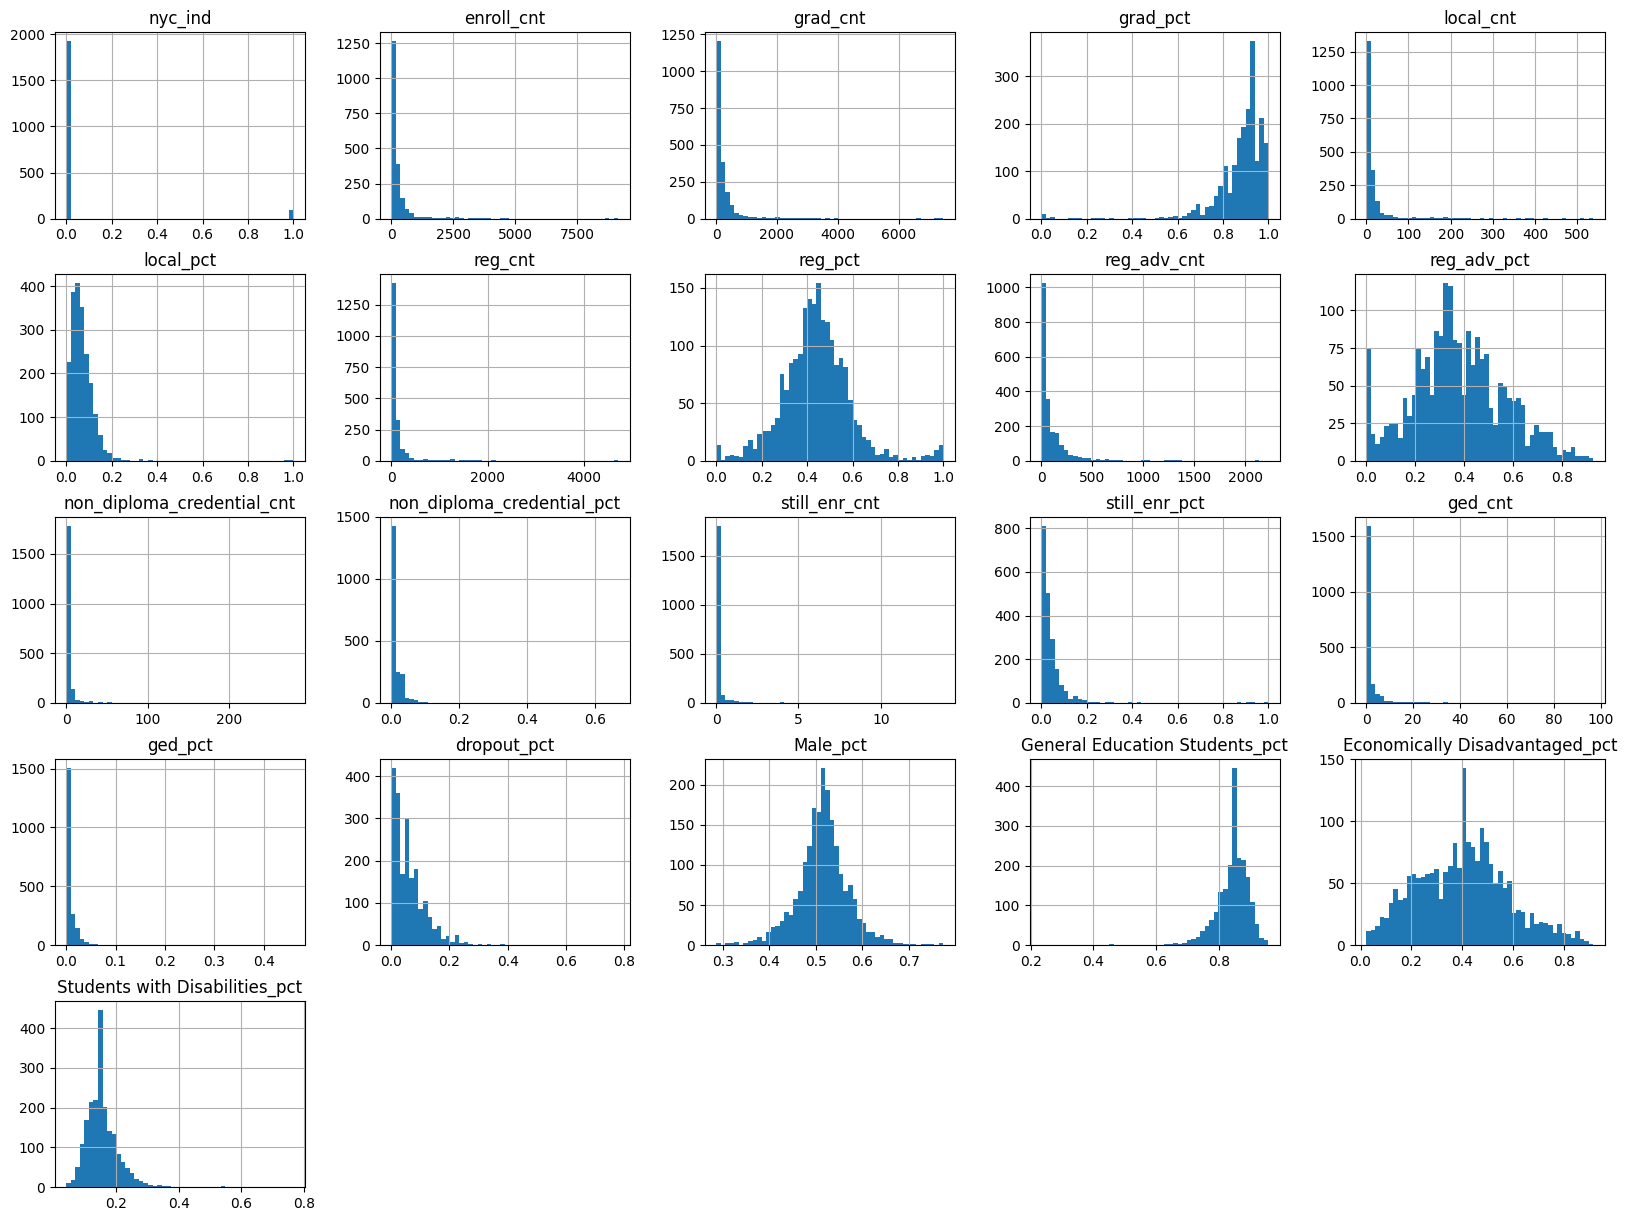

In [69]:
school_dependent.hist(bins=50, figsize=(20,15))
plt.show()

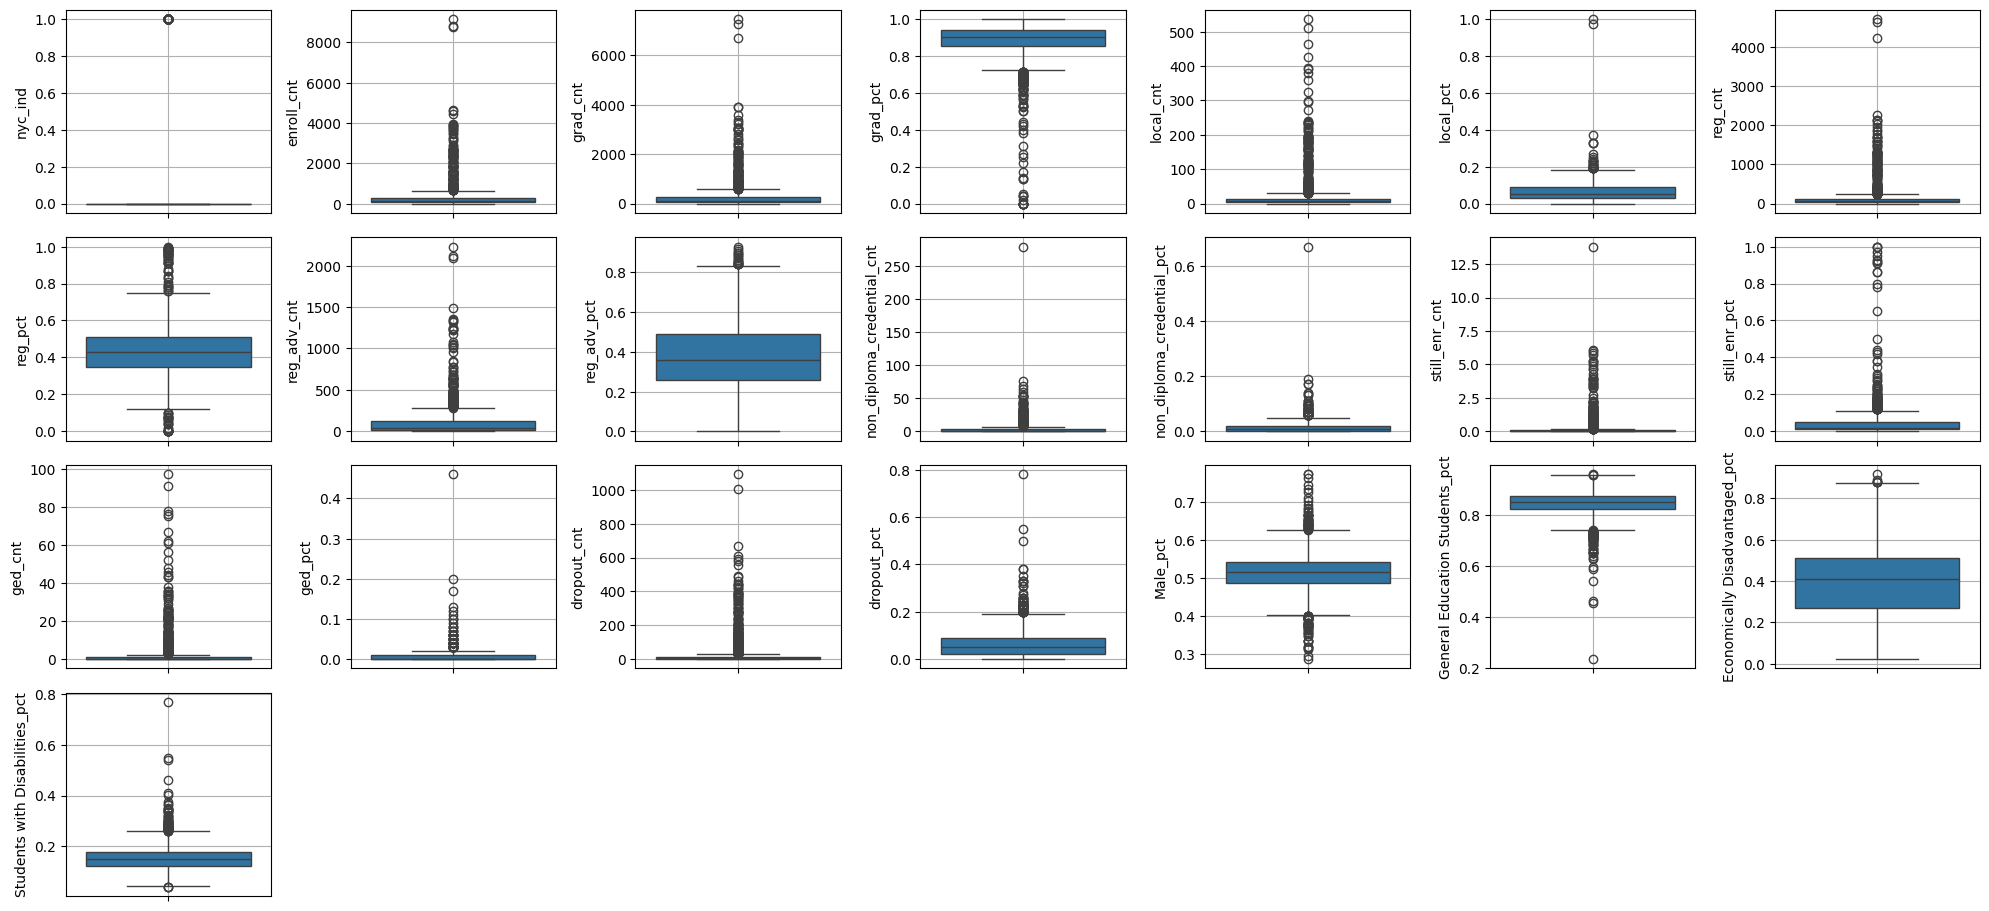

In [70]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(df_school):
    plt.subplot(7,7, i + 1)
    sns.boxplot(data=df_school,y=col,orient="v")
    plt.grid()
    plt.tight_layout()

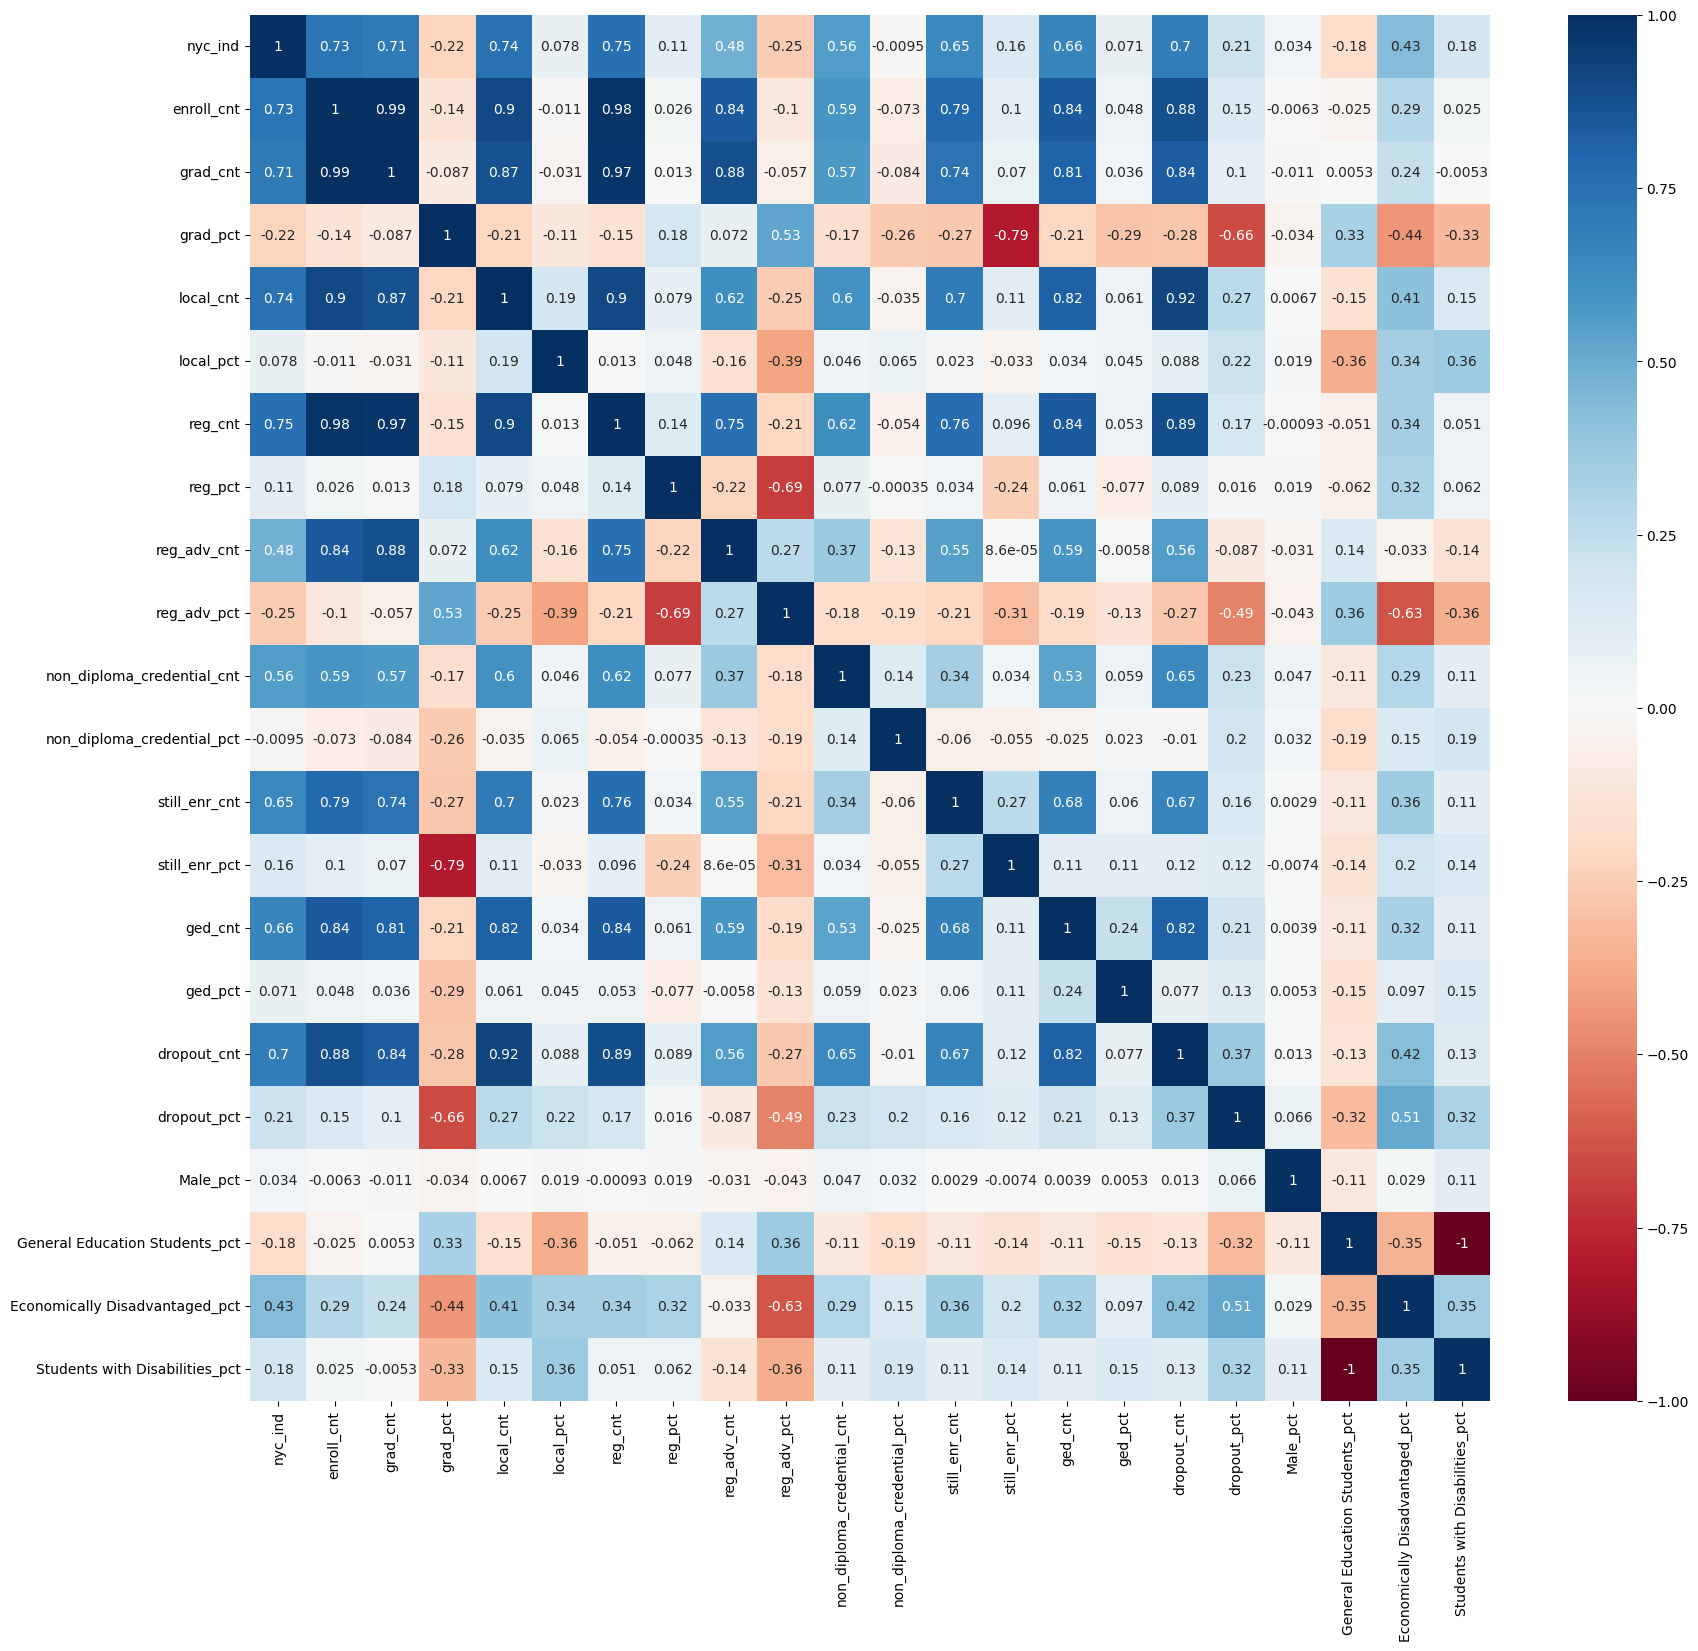

In [71]:
# Use the heatmap to visualize the correlation between each feature

# Finding the correlation bewteen the Features.
plt.figure(figsize=(20,18))

corr = df_school.corr()
# Plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# Show the heatmap
plt.show()

# 5. Regression Modeling

In [72]:
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 5.1 Poisson regression models
__Model 1:__
In Model 1, the smaller the P value, the more significant the relationship between the variable and the response variable. In this model, the P-values ​​for all variables except reg_adv_pct are very small (almost 0). The coefficient represents the logarithmic change in the expected count of the response variable when the variable increases by one unit. We can observe that non_diploma_credential_pct has a significant impact on the response variable. Based on the results of the first Poisson model, we selected all variables expect reg_adv_pct and reg_cnt for model2.


In [73]:
X1_train

,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct,Economically Disadvantaged_pct
22307,105.0,0.93,0.06,0.43,0.45,1.0,0.01,0.00,0.0,0.06,0.438095
30221,254.0,0.99,0.01,0.15,0.82,0.0,0.00,0.00,0.0,0.01,0.173228
56898,685.0,0.90,0.09,0.42,0.39,4.0,0.01,0.02,0.0,0.07,0.486131
62274,81.0,0.91,0.01,0.48,0.42,0.0,0.00,0.00,0.0,0.09,0.271605
3700,79.0,0.82,0.01,0.41,0.41,2.0,0.03,0.01,0.0,0.14,0.240506
...,...,...,...,...,...,...,...,...,...,...,...
29169,246.0,0.97,0.02,0.25,0.71,0.0,0.00,0.03,0.0,0.00,0.097561
43990,95.0,0.92,0.08,0.59,0.24,1.0,0.01,0.02,0.0,0.05,0.536842
59670,1561.0,0.70,0.03,0.45,0.22,3.0,0.00,0.14,0.0,0.16,0.835362
19274,102.0,0.91,0.13,0.50,0.28,3.0,0.03,0.00,0.0,0.06,0.470588


In [74]:
# Add a constant to the selected variables
X1_train_with_intercept = sm.add_constant(X1_train)

# Fit the Poisson regression model with the selected variables
poisson_model_full = sm.GLM(y_train, X1_train_with_intercept, family=sm.families.Poisson()).fit()

# Print the summary of Model 2
print(poisson_model_full.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 1416
Model:                            GLM   Df Residuals:                     1404
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11520.
Date:                Mon, 26 Feb 2024   Deviance:                       18137.
Time:                        00:33:47   Pearson chi2:                 1.95e+04
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

__Model 2:__

In this model, we drop 'reg_adv_pct', 'reg_pct', 'enroll_cnt','non_diploma_credential_cnt' and the P-values for all variables are very small (almost 0). We can observe that the likelihood of model 2 becomes bigger, as it simplifies the model, making it easier to interpret while retaining its effectiveness in predicting the response variable.


In [75]:
# Select specific variables for Model 2
X1_train_selected = X1_train.drop(['reg_adv_pct', 'reg_pct', 'enroll_cnt','non_diploma_credential_cnt'], axis=1)

X1_train_selected

,grad_pct,local_pct,non_diploma_credential_pct,still_enr_pct,ged_pct,dropout_pct,Economically Disadvantaged_pct
22307,0.93,0.06,0.01,0.00,0.0,0.06,0.438095
30221,0.99,0.01,0.00,0.00,0.0,0.01,0.173228
56898,0.90,0.09,0.01,0.02,0.0,0.07,0.486131
62274,0.91,0.01,0.00,0.00,0.0,0.09,0.271605
3700,0.82,0.01,0.03,0.01,0.0,0.14,0.240506
...,...,...,...,...,...,...,...
29169,0.97,0.02,0.00,0.03,0.0,0.00,0.097561
43990,0.92,0.08,0.01,0.02,0.0,0.05,0.536842
59670,0.70,0.03,0.00,0.14,0.0,0.16,0.835362
19274,0.91,0.13,0.03,0.00,0.0,0.06,0.470588


In [76]:
# Add a constant to the selected variables
X1_train_selected_with_intercept = sm.add_constant(X1_train_selected)

# Fit the Poisson regression model with the selected variables
poisson_model_2 = sm.GLM(y_train, X1_train_selected_with_intercept, family=sm.families.Poisson()).fit()

# Print the summary of Model 2
print(poisson_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 1416
Model:                            GLM   Df Residuals:                     1408
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25674.
Date:                Mon, 26 Feb 2024   Deviance:                       46446.
Time:                        00:33:47   Pearson chi2:                 8.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### 5.2 negative Binomial Regression
__Model 1:__
For the negative binomial regression model, we should select a predictor variable that is theoretically meaningful and likely to influence the count of dropouts. And the model is especially suitable for count data. So we choose the count data from the training set.  
Fit the negative binomial regression model using sm.GLM() from the statsmodels library.  
From the summary, we can see all predictors showed significant coefficients with p-value <0.01, indicating their strong impact on dropout count. The model exhibited a high fit with Pseudo R-squared of 0.8320. 

In [77]:
import pandas as pd
import statsmodels.api as sm

X = X_train[['enroll_cnt','non_diploma_credential_cnt','still_enr_cnt']]
y = y_train  

X = sm.add_constant(X)

model1 = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

print(model1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 1416
Model:                            GLM   Df Residuals:                     1412
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4747.1
Date:                Mon, 26 Feb 2024   Deviance:                       1641.1
Time:                        00:33:47   Pearson chi2:                 1.74e+03
No. Iterations:                    55   Pseudo R-squ. (CS):             0.8320
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict using the test set
X_test_nbmodel1 = X_test[['enroll_cnt','non_diploma_credential_cnt','still_enr_cnt']]
X = sm.add_constant(X_test_nbmodel1)

predictions = model1.predict(X)

mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(predictions, y_test)
r_squared = r2_score(predictions, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)

Mean Squared Error: 431917.469060919
Root Mean Squared Error: 657.2042825947797
Mean Absolute Error: 84.46207795049176
R-squared: 0.07731155364696429


- Enroll_cnt: The coefficient of 0.0012 suggests that for every unit increase in enrollment count, the expected count of dropout events increases by 0.0012 units, holding other variables constant. This indicates a positive association between enrollment count and dropout events, which makes sense intuitively as larger schools may face more challenges in retaining students.

- Non_diploma_credential_cnt: With a coefficient of 0.0614, every additional non-diploma credential count is associated with an increase of 0.0614 units in the expected count of dropout events, holding other variables constant. This suggests that students obtaining non-diploma credentials may have a higher likelihood of dropping out, potentially due to various factors such as academic challenges or alternative career paths.

- Still_enr_cnt: The coefficient of 0.3328 implies that for every unit increase in the count of students still enrolled, the expected count of dropout events increases by 0.3328 units, holding other variables constant. This suggests that a higher number of students still enrolled may be associated with increased dropout events, possibly indicating retention challenges within the educational system.

__Model 2:__
For the negative binomial regression model, we again select a predictor variable that is theoretically meaningful and likely to influence the count of dropouts. And the model is especially suitable for count data. This time we put all the variables that we generated after feature selection.
Fit the negative binomial regression model using sm.GLM() from the statsmodels library.  
From the summary, we can see the model achieved a pseudo R-squared value of 0.8986, indicating a good fit. Enroll_cnt and economically disadvantaged percentage showed significant positive associations with dropout counts. Further evaluation using test data is needed to confirm predictive performance.

In [79]:
import pandas as pd
import statsmodels.api as sm

X = X_train
y = y_train  

X = sm.add_constant(X)

model2 = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

print(model2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                 1416
Model:                            GLM   Df Residuals:                     1400
Model Family:        NegativeBinomial   Df Model:                           15
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4389.4
Date:                Mon, 26 Feb 2024   Deviance:                       925.87
Time:                        00:33:48   Pearson chi2:                     638.
No. Iterations:                    47   Pseudo R-squ. (CS):             0.8986
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict using the test set
X_test_nbmodel1 = X_test
X = sm.add_constant(X_test_nbmodel1)

predictions = model2.predict(X)

mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(predictions, y_test)
r_squared = r2_score(predictions, y_test)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)

Mean Squared Error: 13937.586343194913
Root Mean Squared Error: 118.05755521437378
Mean Absolute Error: 21.638632579841396
R-squared: 0.40418144109024345


- Enroll_cnt: A decrease in enrollment count is associated with a decrease in dropout counts.
- Grad_cnt: An increase in the count of graduates is associated with an increase in dropout counts.
- Non_diploma_credential_cnt: An increase in the count of non-diploma credentials is associated with an increase in dropout counts.
- Still_enr_cnt: An increase in the count of students still enrolled is associated with an increase in dropout counts, suggesting that some students may leave school after being enrolled for a certain period without graduating.
- Ged_pct: The positive coefficient for the percentage of GED earners suggests that areas with higher rates of GED attainment may also experience higher dropout counts, potentially indicating challenges or factors that lead students to pursue alternative pathways to completing their education.

- Dropout_pct: As expected, a positive coefficient indicates that a higher percentage of students dropping out is associated with a substantial increase in dropout counts, reflecting the direct impact of dropout rates on overall dropout counts.

- Economically Disadvantaged_pct: The positive coefficient aligns with the understanding that students from economically disadvantaged backgrounds often face additional barriers to academic success, which can contribute to higher dropout rates.

- Students with Disabilities_pct: The negative coefficient suggests that areas with a higher percentage of students with disabilities may experience lower dropout counts. This could be due to increased support and resources available for students with disabilities, potentially reducing their likelihood of dropping out.

### 5.3 Multiple linear regression models
__model 1:__
For the fisrt multiple regression, we will use all the features selected by the feature selection to see the relative between student dropout and the factors.

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#create a model with the variables chosen for model1
multipleregression1=X1_train
multipleregression1=sm.add_constant(multipleregression1)
model5 = sm.OLS(y_train, multipleregression1)
multipleregression1_fit = model5.fit()

#print the results
print(multipleregression1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     772.8
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:33:48   Log-Likelihood:                -6819.1
No. Observations:                1416   AIC:                         1.366e+04
Df Residuals:                    1404   BIC:                         1.373e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

We can see that the R-squared is 0.825 which means that the model explains 82.5% of the variance of the target variable, which is a relatively high value and indicates that the model fits well. But there are some P values is pretty high indicating that they are not particularly significant for predicting dropout_cnt.

In [82]:
# Locate the columns
columns_positions = [1, 2, 3, 4, 5]
X2_train = X_train.iloc[:, columns_positions]
X2_train

,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct
22307,105.0,0.93,0.06,0.43,0.45
30221,254.0,0.99,0.01,0.15,0.82
56898,685.0,0.90,0.09,0.42,0.39
62274,81.0,0.91,0.01,0.48,0.42
3700,79.0,0.82,0.01,0.41,0.41
...,...,...,...,...,...
29169,246.0,0.97,0.02,0.25,0.71
43990,95.0,0.92,0.08,0.59,0.24
59670,1561.0,0.70,0.03,0.45,0.22
19274,102.0,0.91,0.13,0.50,0.28


In [83]:
multipleregression2=X2_train
multipleregression2=sm.add_constant(multipleregression2)
model6 = sm.OLS(y_train, multipleregression2)
multipleregression2_fit = model6.fit()

#print the results
print(multipleregression2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1330.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:33:48   Log-Likelihood:                -6967.9
No. Observations:                1416   AIC:                         1.395e+04
Df Residuals:                    1410   BIC:                         1.398e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.9187      7.115      8.562      

__model 2:__ For the sencond multiple regression model. We only choose top 5 R suqare values evaluated by step forward method.

In [84]:
# Locate the columns
columns_positions = [1, 2, 3, 4, 5]
X2_train = X_train.iloc[:, columns_positions]
X2_train

,enroll_cnt,grad_pct,local_pct,reg_pct,reg_adv_pct
22307,105.0,0.93,0.06,0.43,0.45
30221,254.0,0.99,0.01,0.15,0.82
56898,685.0,0.90,0.09,0.42,0.39
62274,81.0,0.91,0.01,0.48,0.42
3700,79.0,0.82,0.01,0.41,0.41
...,...,...,...,...,...
29169,246.0,0.97,0.02,0.25,0.71
43990,95.0,0.92,0.08,0.59,0.24
59670,1561.0,0.70,0.03,0.45,0.22
19274,102.0,0.91,0.13,0.50,0.28


In [85]:
multipleregression2=X2_train
multipleregression2=sm.add_constant(multipleregression2)
model6 = sm.OLS(y_train, multipleregression2)
multipleregression2_fit = model6.fit()

#print the results
print(multipleregression2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            dropout_cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1330.
Date:                Mon, 26 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:33:56   Log-Likelihood:                -6967.9
No. Observations:                1416   AIC:                         1.395e+04
Df Residuals:                    1410   BIC:                         1.398e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.9187      7.115      8.562      

# 6. Select Models

| Model   |  Log-Likelihood         | AIC  | BIC | R^2   |
|-------------|---------------------|------------|--------------|---------------|
| Model1  |  -14230  | NA   | NA  | Non-Linear   |
| Model2| -21483     |  NA |  NA  |  Non-Linear      |
| Model3|    -4747 |  NA   | NA |  0.8320    |
| Model4  |    -4360.8     | NA   | NA  | 0.9026   |
| Model5|      -6819.1           |  1.366e+04 |  1.373e+04 |  0.858     |
| Model6|    -6967.9          |  1.395e+04   | 1.398e+04 |  0.825    |

In selecting the preferred model, we use the log-likelihood, AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and R-squared (R^2) values. These criteria are commonly used for model selection in regression analysis.

The preferred model is typically the one with the highest log-likelihood, and highest R-squared value. These criteria aim to balance the trade-off between model fit and complexity, with lower AIC and BIC values indicating a better trade-off. Based on the outcome of the analysis, Model4 has the highest log-likelihood (-4360.8) among the models listed, suggesting it provides the best fit to the data. Additionally, Model4 has lower AIC and BIC values compared to the other models, indicating better model performance.

Applying Model4 to the testing subset would involve using the same predictor variables and model specifications as in the training phase. The model's performance on the testing subset can be evaluated using metrics:
Mean Squared Error: 83012.68805222907
Root Mean Squared Error: 288.1192254123787
Mean Absolute Error: 33.06881274036909
R-squared: 0.0896061127062403

Overall, Model4 is the preferred model based on the provided data and model selection criteria. However, to provide a more comprehensive evaluation, further analysis should be conducted on the testing subset to confirm the model's performance.

# 7. Conclusion

In this project, we analyze school performance metrics with an emphasis on graduation rates related indicators and etc. Through exploratory data analysis (EDA) and data cleaning, we have transformed and standardized our dataset in preparation for modeling. We employed Poisson regression models, negative binomial regression models, and linear regression models to predict dropout rates. By comparing the log-likelihood, Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and R-squared (R^2) values, we identified Model 4 as the most suitable for our analysis.

# 8. Reference

- https://timeseriesreasoning.com/contents/negative-binomial-regression-model/
- https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://www.xknote.com/ask/60c9b3246c1ff.html